Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt

In [80]:
# loading data from PArt 1 and Part 2
bike_api = pd.read_csv('bike_locationsfull.csv')
fs_data = pd.read_csv('fs_data.csv')

In [81]:
#rounding the lat and long to merge both the tables upon
d1 = bike_api.round({'latitude':2, 'longitude':2})
d2 = fs_data.round({'latitude':2, 'longitude':2})


In [82]:
bikes_df = d1.merge(d2, how='right',on=['latitude', 'longitude'])

In [83]:
bikes_df.columns

Index(['empty_slots', 'free_bikes', 'latitude', 'longitude', 'name',
       'category', 'rating', 'popularity'],
      dtype='object')

In [84]:
#creating column for total bikes
bikes_df['total_bikes'] = bikes_df['empty_slots'] + bikes_df['free_bikes']

In [85]:
#checking for duplicate rows
duplicate_rows_df = bikes_df[bikes_df.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df.shape)

number of duplicated rows:  (51, 9)


In [86]:
bikes_df.count()

empty_slots    334
free_bikes     334
latitude       387
longitude      387
name           387
category       387
rating         387
popularity     387
total_bikes    334
dtype: int64

In [87]:
# Deleting duplicate data created by join
bikes_df = bikes_df.drop_duplicates()

In [88]:
bikes_df = bikes_df.sort_values(['latitude','longitude'])

In [195]:
# by sorting by lat and long I used the interpolate and nearest method to fill in missing values
bikes_df.interpolate(method = 'nearest', inplace=True)

df = bikes_df[bikes_df.total_bikes != 0.0]

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

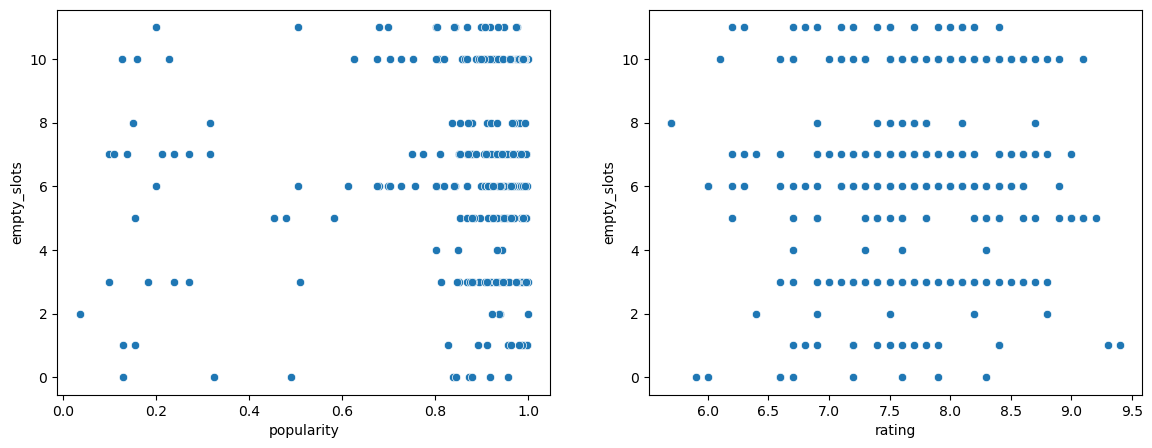

In [196]:
#plotting the popularity and rating against the empty slots in the bike stations to look for patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(ax=axes[0],data=df, x="popularity", y="empty_slots")
sns.scatterplot(ax=axes[1],data=df, x="rating", y="empty_slots")

plt.show()


Looking at the graphs initially, its hard to see a linear relationship between the number of empty slots or total bikes at the bik station and the popularity or rating of the POI's.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [185]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [186]:
connection = create_connection("bikeshare.sqlite")

Connection to SQLite DB successful


In [187]:
df.head()

,empty_slots,free_bikes,latitude,longitude,name,category,rating,popularity,total_bikes
106,7.0,3.0,24.43,54.58,Saddle,Food Truck,8.5,0.995854,10.0
107,7.0,3.0,24.43,54.58,Ushk Cafe,Café,6.3,0.749023,10.0
105,7.0,3.0,24.44,54.58,Food Trucks,Food Truck,8.8,0.995089,10.0
104,7.0,2.0,24.44,54.59,Ibsais Sweets,Dessert Shop,8.2,0.905197,9.0
101,7.0,2.0,24.44,54.60,Bedashing Beauty Lounge,Nail Salon,7.9,0.932541,9.0


In [197]:
#creating table for just the locations of the bike stations 
loc_data = df.loc[:,['latitude', 'longitude', 'empty_slots', 'free_bikes', 'total_bikes']]

In [198]:
#creating table for the POI charecteristics 
POI_data = df.loc[:,['latitude', 'longitude','name', 'category', 'rating', 'popularity']]

In [199]:
loc_data.to_sql("bike_stations", connection, index=False,if_exists='replace')

315

In [200]:
POI_data.to_sql("POIs", connection, index=False,if_exists='replace')

315

In [201]:
# checking if it loaded properly
sql = 'SELECT * FROM POIs'

with connection as con:
    df = pd.read_sql_query(sql, con)
df

,latitude,longitude,name,category,rating,popularity
0,24.43,54.58,Saddle,Food Truck,8.5,0.995854
1,24.43,54.58,Ushk Cafe,Café,6.3,0.749023
2,24.44,54.58,Food Trucks,Food Truck,8.8,0.995089
3,24.44,54.59,Ibsais Sweets,Dessert Shop,8.2,0.905197
4,24.44,54.60,Bedashing Beauty Lounge,Nail Salon,7.9,0.932541
...,...,...,...,...,...,...
310,25.78,55.94,Tim Hortons,Café,8.2,0.939745
311,25.78,55.94,Al Qawasim Corniche (كورنيش القواسم),Harbor / Marina,8.8,0.999202
312,25.78,55.94,فواكة فرغلي,Juice Bar,6.4,0.936552
313,25.78,55.94,Barbera cafe (كوفي باربيرا),Coffee Shop,7.5,0.035116


Look at the data before and after the join to validate your data.

In [193]:
# I validated my data after the joining step above ^